In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import warnings
warnings.filterwarnings('ignore')

# Тема “Элементы теории вероятностей”

### 1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро)

In [0]:
import time

for i in range(0, 5):
  time.sleep(1)  # введем вместо нажатия на Enter запаздывание в цикл
  x = np.random.uniform(0, 36)
  x = int(round(x,0))
  print(x)

23
31
9
3
4


### 2. 


#### 1. Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.


#### Сгенерируйте десять выборок случайных чисел х0, …, х9 и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

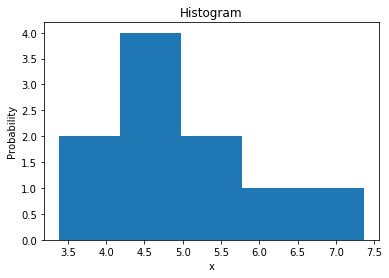

In [0]:
n = 100
x = np.random.rand(n,10)
x0,x1,x2,x3,x4,x5,x6,x7,x8,x9 = x[0],x[1],x[2],x[3],x[4],x[5],x[6],x[7],x[8],x[9]

x_sum = x0+x1+x2+x3+x4+x5+x6+x7+x8+x9
num_bins = 5  # количество бинов
n, bins, patches = plt.hist(x_sum, num_bins)
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Histogram');

### 3.



#### 1. Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.

*P<sub>n</sub>(k) = C<sub>n</sub><sup>k</sup>p<sup>k</sup>q<sup>n-k</sup>*

*C = n!/(k!(n-k)!)*

In [0]:
import itertools
from math import factorial

In [0]:
n = 4
k = 2
C = factorial(n)/(factorial(k)*factorial(n-k))
P = C*(1/(2**n))
print('k={}, n={}, k/n={}'.format(k,n,k/n))
print('Вероятность выпадения орла 2 раза подряд {} раз = {}'.format(k,P))

k=2, n=4, k/n=0.5
Вероятность выпадения орла 2 раза подряд 2 раз = 0.375


#### 2. Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.


In [0]:
k = 0
n = 100
a = np.random.randint(0,2,n)  
b = np.random.randint(0,2,n)
c = np.random.randint(0,2,n)
d = np.random.randint(0,2,n)
x = a+b+c+d
for i in range(0,n):
  if x[i] == 2:
    k = k+1
p = 0.5
q = 0.5

C = factorial(n)/(factorial(k)*factorial(n-k))
P = C*(1/(2**n))
print('k={}, n={}, k/n={}'.format(k,n,k/n))
print('Вероятность выпадения орла 2 раза подряд {} раз = {}'.format(k,P))

k=43, n=100, k/n=0.43
Вероятность выпадения орла 2 раза подряд 43 раз = 0.030068642644214563


### 4. Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k




In [0]:
def combinations(k,n):
  print('Сочетания при k= {} и n={}'.format(k,n))
  for p in itertools.combinations(k, n):
    print(''.join(str(x) for x in p))
  print('-'*30)

def permutations(k,n):
  print('Размещения при k= {} и n={}'.format(k,n))
  for p in itertools.permutations(k,n):
    print(''.join(str(x) for x in p))
  print('-'*30)

def product(k,n):
  print('Перестановки при k= {} и n={}'.format(k,n))
  for p in itertools.product(k, repeat=n):
    print(''.join(p))
  print('-'*30)

In [0]:
combinations('4321',3)
permutations('3451',5)
product('23',3)

Сочетания при k= 4321 и n=3
432
431
421
321
------------------------------
Размещения при k= 3451 и n=5
------------------------------
Перестановки при k= 23 и n=3
222
223
232
233
322
323
332
333
------------------------------


### 5. Дополните код расчетом коэффициента корреляции x и y по формуле

![alt text](https://lh6.googleusercontent.com/ljnbysJzSx8xsPTsalAaoBDElunW_W3AG9OnCc942ymWBFV0yga1aHFsryxvhuFj7Ey3fnj9hQBqfXftNHu6kGfBGfpeNFDkIaZMC_KgJxDhm16J9dUhvWUykj2zzIpVs4PZ-2ug)

#### _
---

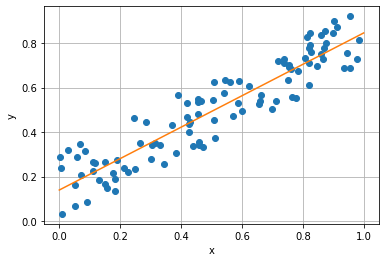

In [0]:
n = 100   # количество чисел
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# 1 вариант расчета коэффициентов регресии (a и b)
a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n
x_lr = np.linspace(0,1,20)
y_lr = a*x_lr + b
plt.plot(x_lr,y_lr);  # график LR

#### Расчет коэффициента корреляции

In [0]:
# 1. Способ по формуле
x_m = np.average(x)
y_m = np.average(y)
numerator = np.sum((x - x_m) * (y - y_m))
denominator = np.sum((x - x_m)**2) * np.sum((y - y_m)**2)
R = numerator / (np.sqrt(denominator))
print('Коэффициент корреляции по формуле =',R)

# 2. Способ как метод numpy
c = np.corrcoef(x,y)[0][1]
print('Коэффициент корреляции (метод np) =',c)

Коэффициент корреляции по формуле = 0.9267700583447019
Коэффициент корреляции (метод np) = 0.9267700583447014
